# LUBS 5990 ACW
### Ankon Bhowmick - 201791639

# Data preparation


In [444]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,roc_curve, roc_auc_score, auc
import sklearn.metrics as skm
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import SVC
import seaborn as sns

In [148]:
df=pd.read_csv(r"C:\Users\ASUS\OneDrive - University of Leeds\Semester 2\LUBS5990\LUBS5990M_courseworkData_2324.csv")

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2767 entries, 0 to 2766
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2767 non-null   int64  
 1   success                2767 non-null   object 
 2   brandSlogan            2767 non-null   object 
 3   hasVideo               2767 non-null   int64  
 4   rating                 2767 non-null   float64
 5   priceUSD               2587 non-null   float64
 6   countryRegion          2696 non-null   object 
 7   startDate              2767 non-null   object 
 8   endDate                2767 non-null   object 
 9   teamSize               2613 non-null   float64
 10  hasGithub              2767 non-null   int64  
 11  hasReddit              2767 non-null   int64  
 12  platform               2767 non-null   object 
 13  coinNum                2767 non-null   float64
 14  minInvestment          2767 non-null   int64  
 15  dist

In [150]:
df[df.columns[[4,5,9,13,15]]].describe()

,rating,priceUSD,teamSize,coinNum,distributedPercentage
count,2767.000000,2587.000000,2613.000000,2.767000e+03,2767.000000
mean,3.121323,19.014036,13.107539,8.177880e+12,1.061370
std,0.714452,775.287126,8.082433,4.300018e+14,17.485513
min,1.000000,0.000000,1.000000,1.200000e+01,0.000000
25%,2.600000,0.040000,7.000000,5.000000e+07,0.400000
50%,3.100000,0.120000,12.000000,1.800000e+08,0.550000
75%,3.700000,0.500000,17.000000,6.000000e+08,0.700000
max,4.800000,39384.000000,75.000000,2.261908e+16,869.750000


In [151]:
df[df.priceUSD>1].sort_values(by='priceUSD', ascending=False)

,ID,success,brandSlogan,hasVideo,rating,priceUSD,countryRegion,startDate,endDate,teamSize,hasGithub,hasReddit,platform,coinNum,minInvestment,distributedPercentage
383,384,N,Participate in the Global Revenue of Osmium,1,4.2,39384.00,Serbia,09/09/2018,30/07/2019,16.0,1,1,Ethereum,210000000.0,0,0.84
39,40,Y,An Evolution of the Gold Standard,1,4.4,1000.00,Cayman Islands,10/09/2018,07/09/2019,32.0,1,1,Ethereum,210000.0,1,0.70
53,54,Y,New World Economic Order,1,3.3,888.88,Liechtenstein,23/11/2018,20/03/2019,25.0,0,1,Ethereum,86780.0,1,0.60
2162,2163,N,Decentralized Live Media Streaming Platform,0,2.6,647.74,USA,22/05/2018,22/10/2018,17.0,0,0,Ethereum,10000000.0,1,0.20
2244,2245,N,Marketing. Redefined.,1,2.4,642.40,USA,28/11/2017,19/12/2017,6.0,0,0,Ethereum,500000.0,0,0.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1570,1571,N,Decentralized Domain Eco System,0,2.9,1.09,Seychelles,02/08/2017,30/09/2017,13.0,0,1,Ethereum,98000000.0,0,0.90
1896,1897,N,The Future of Hiring is Here,1,2.6,1.05,USA,09/04/2018,30/06/2018,7.0,1,1,Ethereum,17000000.0,0,0.23
1803,1804,N,Expanding the usage of cryptocurrencies,1,3.0,1.02,Estonia,20/11/2017,20/12/2017,9.0,0,0,Ethereum,12000000.0,0,0.50
80,81,Y,A Revolution in Global Investment,1,4.3,1.01,Switzerland,27/12/2018,27/03/2019,20.0,1,1,Ethereum,45000000.0,1,0.45


In [152]:
df.startDate.min()

'01/01/2018'

In [153]:
df.startDate.max()

'31/12/2018'

In [154]:
df.endDate.min()

'01/01/2018'

In [155]:
df.endDate.max()

'31/12/2019'

In [156]:
df.isna().sum(axis=1).sum()

405

In [157]:
df.isna().sum()

ID                         0
success                    0
brandSlogan                0
hasVideo                   0
rating                     0
priceUSD                 180
countryRegion             71
startDate                  0
endDate                    0
teamSize                 154
hasGithub                  0
hasReddit                  0
platform                   0
coinNum                    0
minInvestment              0
distributedPercentage      0
dtype: int64

In [158]:
df1=df.copy()

In [159]:
df1=df1.dropna()

## Categorical variables

### Binary

In [160]:
col=[1,3,10,11,14]
for x in col:
    print(pd.unique(df[df.columns[x]]))

['N' 'Y']
[1 0]
[1 0]
[1 0]
[0 1]


<Axes: xlabel='success'>

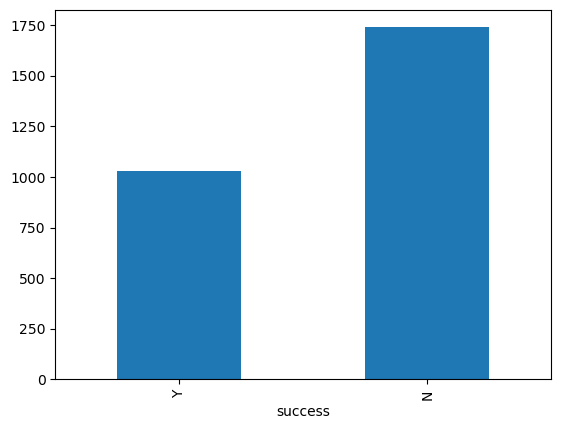

In [161]:
df[df.columns[1]].value_counts(ascending=True).plot.bar()

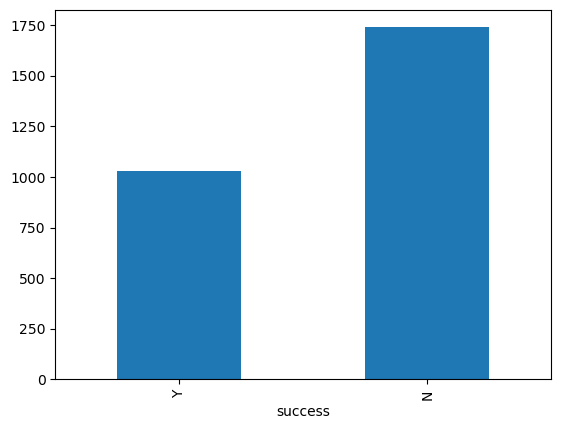

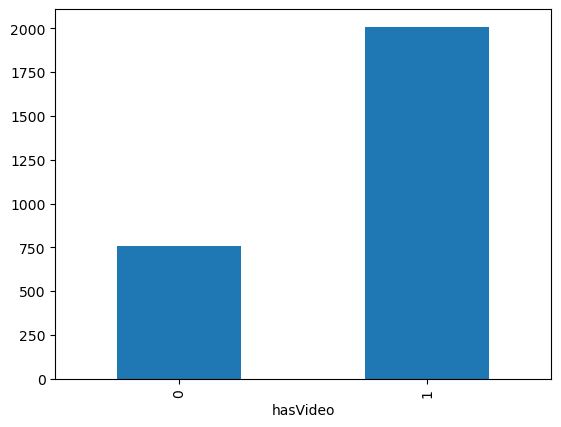

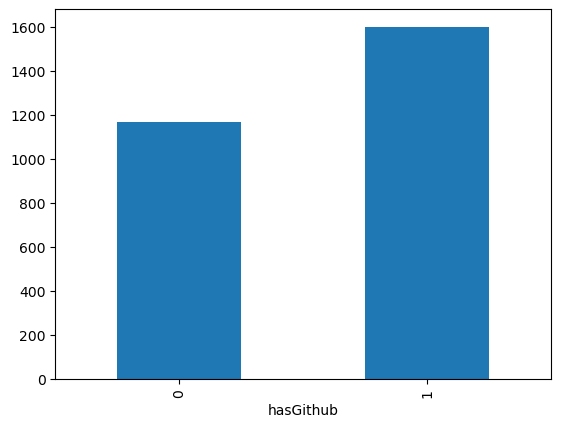

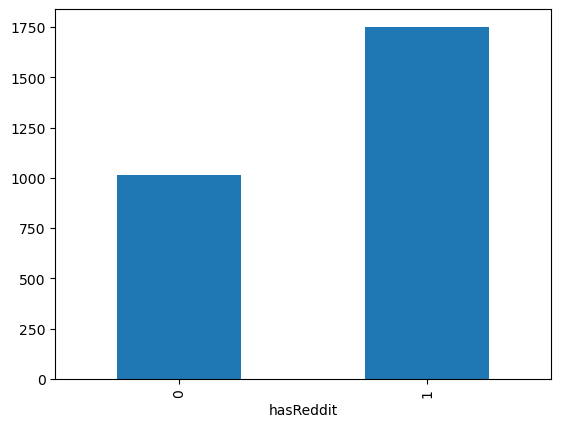

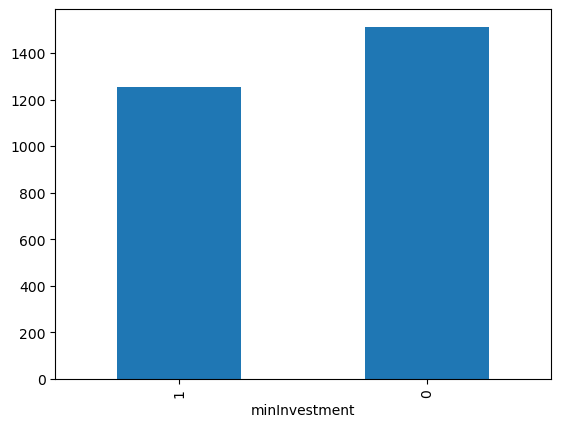

In [162]:
for x in col:
    df[df.columns[x]].value_counts(ascending=True).plot.bar()
    plt.show()

In [163]:
for x in col:
    print(df[df.columns[x]].value_counts(ascending=True)/df[df.columns[x]].value_counts(ascending=True).sum())

success
Y    0.371522
N    0.628478
Name: count, dtype: float64
hasVideo
0    0.273943
1    0.726057
Name: count, dtype: float64
hasGithub
0    0.422118
1    0.577882
Name: count, dtype: float64
hasReddit
0    0.367185
1    0.632815
Name: count, dtype: float64
minInvestment
1    0.453198
0    0.546802
Name: count, dtype: float64


### Polytomous

In [164]:
len(np.sort(df1.platform.unique()))

113

## Numeric variables

In [165]:
numeric_in=[4,5,9,13,15]

In [166]:
df1.corr(numeric_only=True)

,ID,hasVideo,rating,priceUSD,teamSize,hasGithub,hasReddit,coinNum,minInvestment,distributedPercentage
ID,1.000000,-0.445079,-0.859638,-0.023679,-0.366255,-0.491958,-0.513748,0.008265,-0.212943,-0.007035
hasVideo,-0.445079,1.000000,0.431187,0.011446,0.239843,0.260016,0.268548,0.011675,0.098436,0.010874
rating,-0.859638,0.431187,1.000000,0.029387,0.408729,0.463706,0.471763,-0.009490,0.172905,0.006445
priceUSD,-0.023679,0.011446,0.029387,1.000000,0.008255,0.016102,0.014013,-0.000505,-0.018017,-0.000373
teamSize,-0.366255,0.239843,0.408729,0.008255,1.000000,0.194875,0.220047,-0.013359,0.092922,-0.021182
hasGithub,-0.491958,0.260016,0.463706,0.016102,0.194875,1.000000,0.346881,0.016948,0.149801,0.016208
hasReddit,-0.513748,0.268548,0.471763,0.014013,0.220047,0.346881,1.000000,0.014728,0.119300,0.012720
coinNum,0.008265,0.011675,-0.009490,-0.000505,-0.013359,0.016948,0.014728,1.000000,-0.019142,-0.000663
minInvestment,-0.212943,0.098436,0.172905,-0.018017,0.092922,0.149801,0.119300,-0.019142,1.000000,-0.021615
distributedPercentage,-0.007035,0.010874,0.006445,-0.000373,-0.021182,0.016208,0.012720,-0.000663,-0.021615,1.000000


<Axes: >

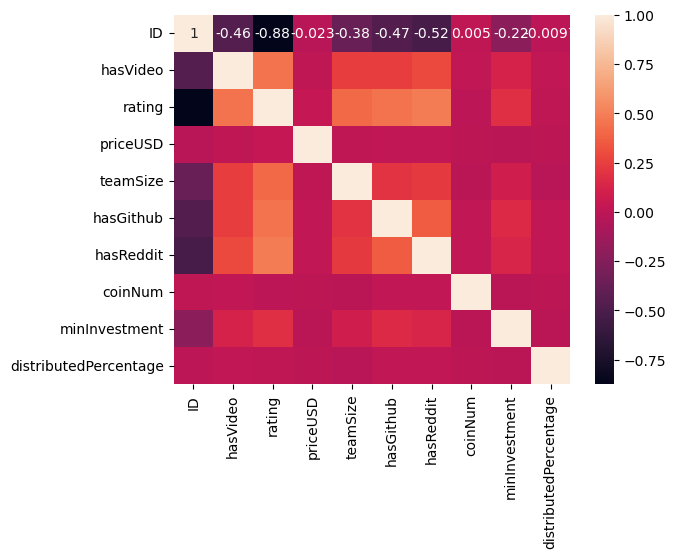

In [167]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [168]:
df.columns[[4,5]]

Index(['rating', 'priceUSD'], dtype='object')

<Axes: >

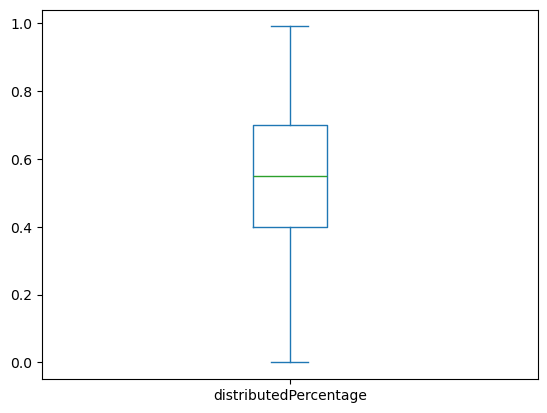

In [169]:
df1[df1.distributedPercentage<1].distributedPercentage.plot.box()

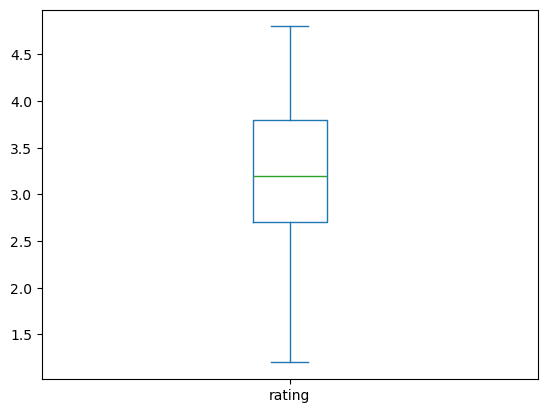

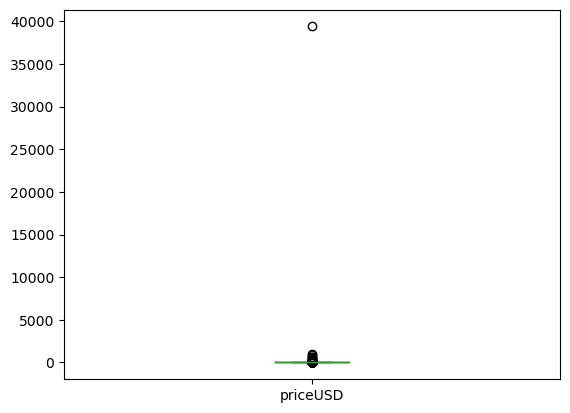

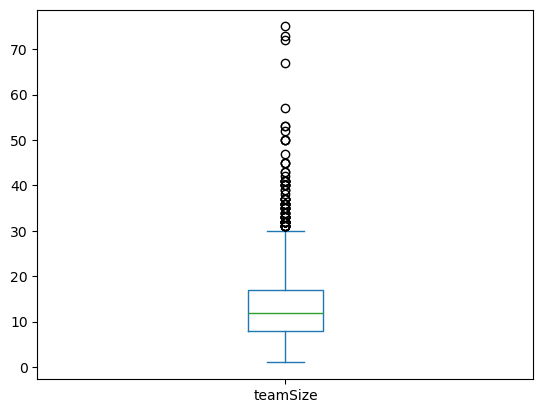

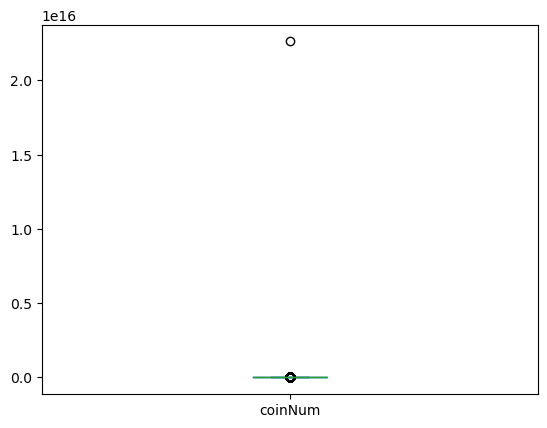

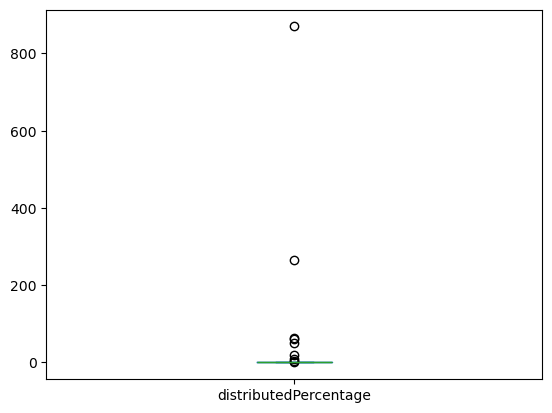

In [170]:
for i in numeric_in:
    df1[df1.columns[[i]]].plot.box()
    plt.show()

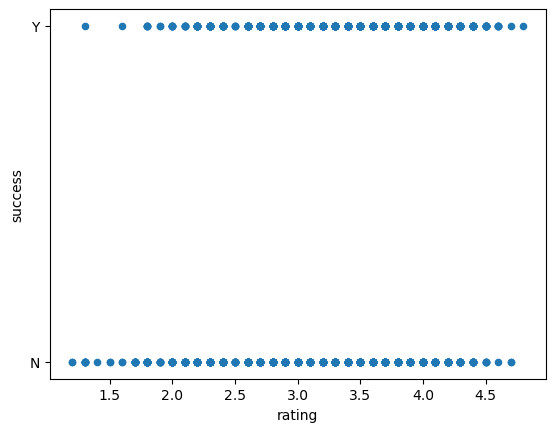

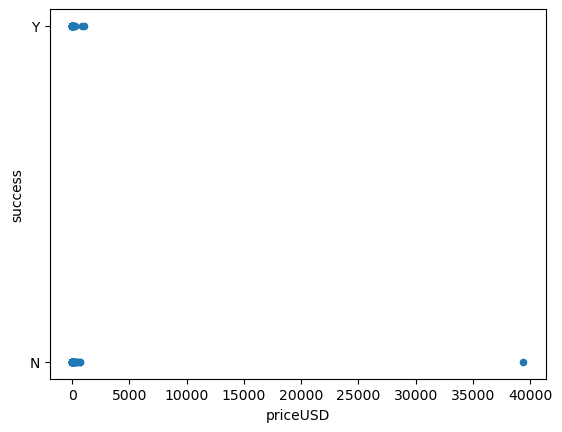

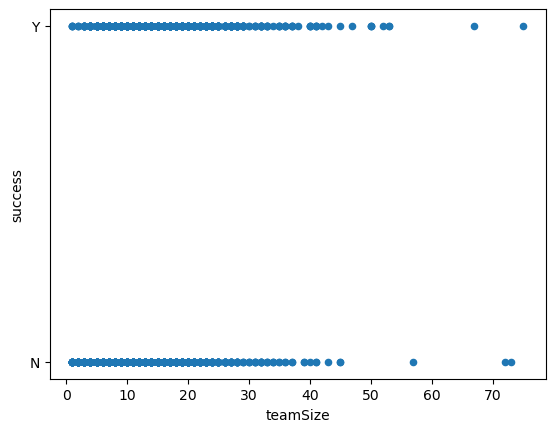

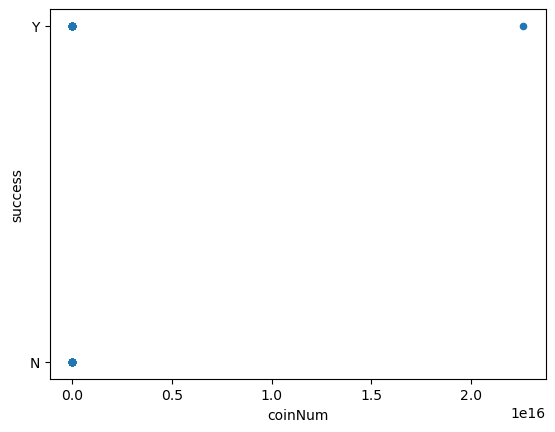

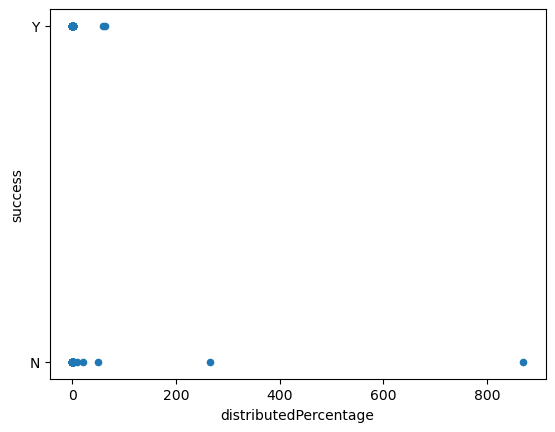

In [171]:
for i in numeric_in:
    df1.plot.scatter(x=df1.columns[i],y='success')
    plt.show()

In [172]:
df1['TotalInv']=df1['priceUSD']*df1['coinNum']

In [173]:
df1[df1.columns[[-1]]].describe()

,TotalInv
count,2.392000e+03
mean,1.159093e+11
std,4.700977e+12
min,0.000000e+00
25%,8.000000e+06
50%,2.325000e+07
75%,5.250000e+07
max,2.261908e+14


In [174]:
3.0%1==0

True

In [277]:
df1.sort_values(by='priceUSD',ascending=False).head(15)

,success,hasVideo,rating,priceUSD,countryRegion,teamSize,hasGithub,hasReddit,platform,coinNum,minInvestment,distributedPercentage,TotalInv,time
39,1,1,4.4,1000.00,Cayman Islands,32.0,1,1,Ethereum,2.100000e+05,1,0.70,2.100000e+08,362
53,1,1,3.3,888.88,Liechtenstein,25.0,0,1,Ethereum,8.678000e+04,1,0.60,7.713701e+07,117
2162,0,0,2.6,647.74,USA,17.0,0,0,Ethereum,1.000000e+07,1,0.20,6.477400e+09,153
2244,0,1,2.4,642.40,USA,6.0,0,0,Ethereum,5.000000e+05,0,0.74,3.212000e+08,21
2238,0,1,2.4,525.01,Singapore,6.0,1,0,Ethereum,1.000000e+09,1,0.50,5.250100e+11,7
2082,0,0,2.6,409.17,British Virgin Islands,23.0,0,1,Ethereum,9.894000e+10,0,0.99,4.048328e+13,168
1288,0,1,3.2,295.34,Estonia,18.0,1,0,Ethereum,4.536000e+07,0,0.81,1.339662e+10,60
684,0,1,3.9,295.34,UK,27.0,0,1,Ethereum,1.250000e+08,1,0.25,3.691750e+10,91
2527,0,0,2.2,237.49,Japan,4.0,0,0,Ethereum,1.500000e+05,0,0.50,3.562350e+07,14
1596,1,0,3.0,230.77,Australia,20.0,1,1,Ethereum,7.000000e+07,0,0.70,1.615390e+10,31


In [276]:
df1.drop(labels=df1[df1.priceUSD==df1.priceUSD.max()].index,axis=0,inplace=True)

In [177]:
df1

,ID,success,brandSlogan,hasVideo,rating,priceUSD,countryRegion,startDate,endDate,teamSize,hasGithub,hasReddit,platform,coinNum,minInvestment,distributedPercentage,TotalInv
0,1,N,Is One of Its Kind ERC-20 Decentralized Stable...,1,4.0,30.00,Singapore,01/10/2019,01/10/2019,31.0,1,1,Ethereum,5.099990e+05,0,0.49,1.529997e+07
1,2,N,The Ultimate Blockchain Gaming Platform,1,4.3,0.13,Malta,07/09/2018,12/10/2018,20.0,1,1,XAYA,2.250000e+08,1,0.41,2.925000e+07
2,3,N,Simple Automated Investment App Driven by AI & ML,1,4.4,0.01,UK,01/07/2019,30/06/2020,10.0,1,1,Stellar,5.000000e+09,1,0.40,5.000000e+07
4,5,N,"Secure, Interference-Free Communications System",1,4.3,0.03,Mauritius,28/07/2019,30/11/2019,14.0,1,1,Ethereum,5.000000e+09,1,0.50,1.500000e+08
5,6,N,Blockchain-based Bank Full Eco System WorldWide,1,4.7,0.10,UK,25/02/2020,30/06/2020,43.0,1,1,Ethereum,5.000000e+08,1,0.50,5.000000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2737,2738,N,Decentralised Global Index Trading Platform,0,1.3,0.05,Poland,08/03/2018,01/08/2018,1.0,0,0,Ethereum,7.000000e+08,0,0.70,3.500000e+07
2738,2739,N,The best way to say thank you,0,1.3,1.00,Russia,17/08/2017,05/10/2017,4.0,0,0,Waves,3.500000e+07,0,0.50,3.500000e+07
2742,2743,N,HorseCoin.,0,1.3,0.04,Belgium,24/02/2018,29/06/2018,6.0,1,1,Ethereum,2.000000e+07,0,0.80,8.000000e+05
2746,2747,N,A Cryptocurrency Value Chain,0,1.2,1.00,Singapore,07/10/2017,15/10/2017,1.0,0,0,Ethereum,2.000000e+07,0,0.30,2.000000e+07


<Axes: >

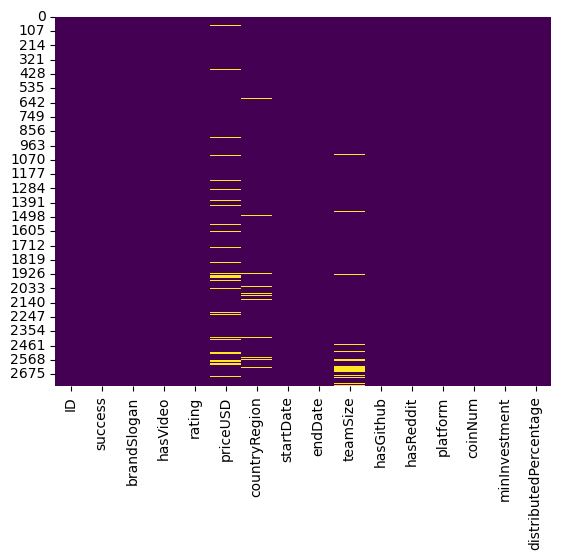

In [178]:
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)

In [179]:
df1.duplicated().sum()

0

In [180]:
df.isna().product(axis=1).sum()

0

In [181]:
df1.shape

(2392, 17)

In [182]:
df1[df1.distributedPercentage>1]

,ID,success,brandSlogan,hasVideo,rating,priceUSD,countryRegion,startDate,endDate,teamSize,hasGithub,hasReddit,platform,coinNum,minInvestment,distributedPercentage,TotalInv
98,99,Y,iCoin ICO - backed by real diamond mining.,1,4.1,1.00,Sierra Leone,05/08/2019,21/10/2019,13.0,1,1,Ethereum,1.000000e+07,1,1.66,10000000.0
541,542,N,Get Noticed!,1,3.8,0.39,Canada,06/04/2019,15/07/2019,10.0,1,1,NEO,4.000000e+06,1,4.00,1560000.0
680,681,N,It's time to create your token,1,3.7,0.02,France,04/11/2019,30/01/2020,8.0,0,1,Waves,2.000000e+07,1,9.52,400000.0
946,947,Y,Welcome to Play2Live!,1,4.1,0.05,Malta,21/02/2018,14/03/2018,23.0,0,0,Ethereum,1.308800e+09,1,62.50,65440000.0
964,965,N,The Coin You Can Bank On,1,3.5,2.88,Thailand,01/06/2018,30/06/2018,7.0,1,1,X11,6.656250e+06,0,266.25,19170000.0
1029,1030,N,Create Artificial Intelligence And Make Money ...,1,3.3,0.50,Switzerland,15/11/2019,15/05/2020,7.0,1,1,Ethereum,1.739500e+07,0,869.75,8697500.0
1403,1404,N,A new way to contribute to innovation,1,3.0,0.10,United Arab Emirates,10/07/2017,11/08/2017,9.0,1,1,Ethereum,3.000000e+06,0,20.00,300000.0
1655,1656,N,ZooomEx - Your Great Choice,0,4.2,0.03,Russia,19/08/2019,31/08/2019,3.0,0,0,Ethereum,5.000000e+07,0,50.00,1500000.0
1987,1988,Y,First ICO for Adult Entertainment,0,2.7,2.75,Estonia,20/07/2017,29/08/2017,9.0,0,0,Ethereum,3.000000e+06,1,60.00,8250000.0


In [183]:
df.head()

,ID,success,brandSlogan,hasVideo,rating,priceUSD,countryRegion,startDate,endDate,teamSize,hasGithub,hasReddit,platform,coinNum,minInvestment,distributedPercentage
0,1,N,Is One of Its Kind ERC-20 Decentralized Stable...,1,4.0,30.00,Singapore,01/10/2019,01/10/2019,31.0,1,1,Ethereum,5.099990e+05,0,0.49
1,2,N,The Ultimate Blockchain Gaming Platform,1,4.3,0.13,Malta,07/09/2018,12/10/2018,20.0,1,1,XAYA,2.250000e+08,1,0.41
2,3,N,Simple Automated Investment App Driven by AI & ML,1,4.4,0.01,UK,01/07/2019,30/06/2020,10.0,1,1,Stellar,5.000000e+09,1,0.40
3,4,Y,International Real Estate Crowdfunding Platform,1,4.3,NaN,Netherlands,01/10/2019,15/12/2019,27.0,1,1,Separate blockchain,1.250000e+08,1,0.13
4,5,N,"Secure, Interference-Free Communications System",1,4.3,0.03,Mauritius,28/07/2019,30/11/2019,14.0,1,1,Ethereum,5.000000e+09,1,0.50


## Data Manipulation

In [184]:
df1.replace(['Y','N'],[1,0],inplace=True)

In [185]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2392 entries, 0 to 2752
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2392 non-null   int64  
 1   success                2392 non-null   int64  
 2   brandSlogan            2392 non-null   object 
 3   hasVideo               2392 non-null   int64  
 4   rating                 2392 non-null   float64
 5   priceUSD               2392 non-null   float64
 6   countryRegion          2392 non-null   object 
 7   startDate              2392 non-null   object 
 8   endDate                2392 non-null   object 
 9   teamSize               2392 non-null   float64
 10  hasGithub              2392 non-null   int64  
 11  hasReddit              2392 non-null   int64  
 12  platform               2392 non-null   object 
 13  coinNum                2392 non-null   float64
 14  minInvestment          2392 non-null   int64  
 15  distribut

### Platform

In [186]:
# Fix ethereum
x=pd.Series(df1.platform.unique())
y=x.str.contains('eth',case=False)
eth=x[y[y==True].index].values
df1.platform.replace(eth,'Ethereum',inplace=True)

In [187]:
len(df.platform.unique())

130

In [188]:
len(df1.platform.unique())

103

In [189]:
df1.groupby(by='platform').success.sum()

platform
                     1
 NEO                 0
AION                 0
Acclaim              0
Achain               1
                    ..
Zuum                 0
iOlite Blockchain    1
pow/pos              0
xDAC                 1
​Komodo              1
Name: success, Length: 103, dtype: int64

In [190]:
platform=pd.DataFrame(df1.groupby(by='platform').success.sum()*100/df1.groupby(by='platform').success.count())
platform2=pd.DataFrame(df1.groupby(by='platform').success.count())
platform=platform.rename(columns={'success':'rate'})
platform=platform.merge(platform2,on='platform')
platform=platform.rename(columns={'success':'count'})

In [191]:
platform.sort_values(by='count',ascending=False)

,rate,count
platform,,
Ethereum,40.000000,2095
Waves,30.000000,50
Stellar,27.027027,37
Separate blockchain,51.851852,27
NEO,45.000000,20
...,...,...
ISL-Blockchain,0.000000,1
IOV Blockchain,0.000000,1
Hard-Fork of Litecoin,0.000000,1


In [192]:
platform=platform.drop(platform['count'].idxmax())

<Axes: xlabel='count', ylabel='rate'>

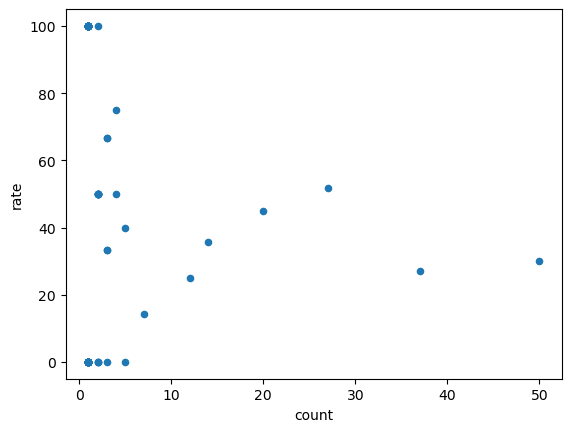

In [193]:
platform.plot.scatter(x='count',y='rate')

In [194]:
platform[platform['rate']<=25].sort_values(by='count',ascending=False)

,rate,count
platform,,
NEM,25.000000,12
X11,14.285714,7
Bitcoin,0.000000,5
NXT,0.000000,3
Native,0.000000,2
Bitshares,0.000000,2
POS,0.000000,2
SmartX,0.000000,1
Neblio,0.000000,1


In [195]:
platform.sort_values(by='count',ascending=False)

,rate,count
platform,,
Waves,30.000000,50
Stellar,27.027027,37
Separate blockchain,51.851852,27
NEO,45.000000,20
EOS,35.714286,14
...,...,...
ISL-Blockchain,0.000000,1
IOV Blockchain,0.000000,1
Hard-Fork of Litecoin,0.000000,1


In [196]:
grp_plat=platform[platform['rate']<=25].index

In [197]:
df1.platform.replace(grp_plat,'others',inplace=True)

In [198]:
len(df1.platform.unique())

49

### Country/Region

In [199]:
country=pd.DataFrame(df1.groupby(by='countryRegion').success.sum()*100/df1.groupby(by='countryRegion').success.count())
country2=pd.DataFrame(df1.groupby(by='countryRegion').success.count())
country=country.rename(columns={'success':'rate'})
country=country.merge(country2,on='countryRegion')
country=country.rename(columns={'success':'count'})

In [200]:
country.sort_values(by='count',ascending=False).tail(20)

,rate,count
countryRegion,,
Congo,0.0,1
Ghana,0.0,1
Northern Mariana Islands,0.0,1
Guinea-Bissau,100.0,1
New Caledonia,0.0,1
México,0.0,1
Puerto Rico,0.0,1
Montenegro,100.0,1
SINGAPORE,100.0,1


<Axes: xlabel='count', ylabel='rate'>

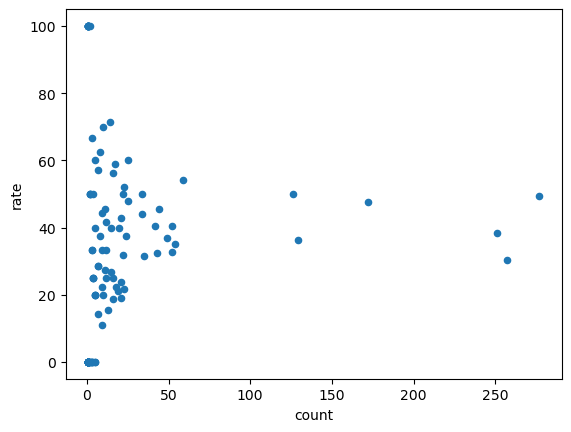

In [201]:
country.plot.scatter(x='count',y='rate')

In [202]:
len(np.sort(df1.countryRegion.unique()))

114

In [203]:
df1.countryRegion.replace({'Curaçao':'Curacao','México':'Mexico','india':'India'},inplace=True)

### Datetime

In [204]:
df1['startDate']=pd.to_datetime(df1['startDate'],dayfirst='True')
df1['endDate']=pd.to_datetime(df1['endDate'],dayfirst='True')

In [205]:
time=df1['endDate']-df1['startDate']
time=time.astype('int64')
time_ind=time[time<0].index

In [206]:
time=df1['endDate']-df1['startDate']
df1['time']=time.dt.days

In [207]:
df1=df1.drop(labels=time_ind)

In [208]:
df1.columns

Index(['ID', 'success', 'brandSlogan', 'hasVideo', 'rating', 'priceUSD',
       'countryRegion', 'startDate', 'endDate', 'teamSize', 'hasGithub',
       'hasReddit', 'platform', 'coinNum', 'minInvestment',
       'distributedPercentage', 'TotalInv', 'time'],
      dtype='object')

### Drop percentage

In [209]:
df1[df1.distributedPercentage>1]

,ID,success,brandSlogan,hasVideo,rating,priceUSD,countryRegion,startDate,endDate,teamSize,hasGithub,hasReddit,platform,coinNum,minInvestment,distributedPercentage,TotalInv,time
98,99,1,iCoin ICO - backed by real diamond mining.,1,4.1,1.00,Sierra Leone,2019-08-05,2019-10-21,13.0,1,1,Ethereum,1.000000e+07,1,1.66,10000000.0,77
541,542,0,Get Noticed!,1,3.8,0.39,Canada,2019-04-06,2019-07-15,10.0,1,1,NEO,4.000000e+06,1,4.00,1560000.0,100
680,681,0,It's time to create your token,1,3.7,0.02,France,2019-11-04,2020-01-30,8.0,0,1,Waves,2.000000e+07,1,9.52,400000.0,87
946,947,1,Welcome to Play2Live!,1,4.1,0.05,Malta,2018-02-21,2018-03-14,23.0,0,0,Ethereum,1.308800e+09,1,62.50,65440000.0,21
964,965,0,The Coin You Can Bank On,1,3.5,2.88,Thailand,2018-06-01,2018-06-30,7.0,1,1,others,6.656250e+06,0,266.25,19170000.0,29
1029,1030,0,Create Artificial Intelligence And Make Money ...,1,3.3,0.50,Switzerland,2019-11-15,2020-05-15,7.0,1,1,Ethereum,1.739500e+07,0,869.75,8697500.0,182
1403,1404,0,A new way to contribute to innovation,1,3.0,0.10,United Arab Emirates,2017-07-10,2017-08-11,9.0,1,1,Ethereum,3.000000e+06,0,20.00,300000.0,32
1655,1656,0,ZooomEx - Your Great Choice,0,4.2,0.03,Russia,2019-08-19,2019-08-31,3.0,0,0,Ethereum,5.000000e+07,0,50.00,1500000.0,12
1987,1988,1,First ICO for Adult Entertainment,0,2.7,2.75,Estonia,2017-07-20,2017-08-29,9.0,0,0,Ethereum,3.000000e+06,1,60.00,8250000.0,40


In [210]:
df1.drop(labels=df1[df1.distributedPercentage>1].index,axis=0,inplace=True)

## One-hot encoding

In [211]:
df1.drop('ID',axis=1,inplace=True)

In [212]:
df1.drop(['brandSlogan','startDate','endDate'],axis=1,inplace=True)

In [213]:
df1.shape

(2372, 14)

In [214]:
df1.head()

,success,hasVideo,rating,priceUSD,countryRegion,teamSize,hasGithub,hasReddit,platform,coinNum,minInvestment,distributedPercentage,TotalInv,time
0,0,1,4.0,30.00,Singapore,31.0,1,1,Ethereum,5.099990e+05,0,0.49,15299970.0,0
1,0,1,4.3,0.13,Malta,20.0,1,1,others,2.250000e+08,1,0.41,29250000.0,35
2,0,1,4.4,0.01,UK,10.0,1,1,Stellar,5.000000e+09,1,0.40,50000000.0,365
4,0,1,4.3,0.03,Mauritius,14.0,1,1,Ethereum,5.000000e+09,1,0.50,150000000.0,125
5,0,1,4.7,0.10,UK,43.0,1,1,Ethereum,5.000000e+08,1,0.50,50000000.0,126


In [383]:
df_f=pd.get_dummies(df1,columns=['platform','countryRegion'])
df_f.priceUSD.max()

1000.0

In [216]:
df_f.success.sum()/23.72

39.50252951096122

In [217]:
df_f.shape

(2372, 170)

# Modelling

In [384]:
X=df_f[df_f.columns[1:]]
Y=df_f[df_f.columns[0]]

In [219]:
X.shape

(2372, 169)

In [220]:
from math import sqrt
#no_f=int(sqrt(df_f.shape[1]))
no_f=30

In [221]:
model1=RandomForestClassifier(max_features=no_f,oob_score=True,min_samples_leaf=5,n_estimators=75,max_samples=1500)

In [222]:
model1=model1.fit(X,Y)

In [223]:
model1.oob_score_

0.6572512647554806

In [385]:
X_train, X_test, Y_train, Y_test = train_test_split(
...     X, Y, test_size=0.20, random_state=42)

In [386]:
model2=RandomForestClassifier(max_features=20,oob_score=True,min_samples_leaf=2,n_estimators=50,max_samples=1000)

In [387]:
model2=model2.fit(X_train,Y_train)

In [388]:
model2.oob_score_

0.6645569620253164

In [389]:
Y_pred=model2.predict(X_test)

In [390]:
model2.predict(X_test).sum()

137

In [391]:
cm=confusion_matrix(Y_test,Y_pred)
cm

array([[222,  56],
       [116,  81]], dtype=int64)

In [392]:
skm.accuracy_score(Y_test,Y_pred)

0.6378947368421053

In [393]:
skm.precision_recall_fscore_support(Y_test,Y_pred)

(array([0.65680473, 0.59124088]),
 array([0.79856115, 0.41116751]),
 array([0.72077922, 0.48502994]),
 array([278, 197], dtype=int64))

### Oversampling

In [236]:
oversamp=SMOTE()

In [237]:
X_train_os, Y_train_os = oversamp.fit_resample(X_train, Y_train)

In [238]:
X_train.shape

(1897, 169)

In [239]:
X_train_os.shape

(2310, 169)

In [240]:
Y_train_os.shape

(2310,)

In [241]:
Y_train_os.sum()

1155

In [242]:
Y_train.sum()

742

In [243]:
model3=RandomForestClassifier(max_features=no_f,oob_score=True,min_samples_leaf=5,n_estimators=50,max_samples=1500)

In [244]:
model3=model3.fit(X_train_os,Y_train_os)

In [245]:
model3.oob_score_

0.6831168831168831

In [246]:
Y_pred_os=model3.predict(X_test)

In [247]:
cm=confusion_matrix(Y_test,Y_pred_os)

In [248]:
cm

array([[182,  98],
       [ 72, 123]], dtype=int64)

In [249]:
skm.accuracy_score(Y_test,Y_pred_os)

0.6421052631578947

In [250]:
skm.accuracy_score(Y_test,Y_pred_os)

0.6421052631578947

In [251]:
skm.precision_recall_fscore_support(Y_test,Y_pred_os)

(array([0.71653543, 0.55656109]),
 array([0.65      , 0.63076923]),
 array([0.68164794, 0.59134615]),
 array([280, 195], dtype=int64))

### SVM

In [327]:
normalized_df=df_f.astype('float64')

In [328]:
normalized_df=(normalized_df-normalized_df.min())/(normalized_df.max()-normalized_df.min())

In [330]:
X1=normalized_df[normalized_df.columns[1:]]
Y1=normalized_df[normalized_df.columns[0]]

In [340]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(
...     X1, Y1, test_size=0.20, random_state=42)

In [448]:
model4=SVC(C=0.5,kernel='poly',class_weight='balanced',probability=True)

In [449]:
model4=model4.fit(X1_train,Y1_train)

In [450]:
Y1_pred=model4.predict(X1_test)
Y1_pred.sum()

224.0

In [451]:
model4.predict(X1_train).sum()

845.0

In [452]:
cm1=confusion_matrix(Y1_test,Y1_pred)
cm1

array([[176, 104],
       [ 75, 120]], dtype=int64)

In [453]:
skm.accuracy_score(Y1_test,Y1_pred)

0.6231578947368421

In [454]:
skm.precision_recall_fscore_support(Y1_test,Y1_pred)

(array([0.70119522, 0.53571429]),
 array([0.62857143, 0.61538462]),
 array([0.66290019, 0.57279236]),
 array([280, 195], dtype=int64))

### Undersampling

In [260]:
rus=RandomUnderSampler(random_state=40)
X_train_us,Y_train_us=rus.fit_resample(X_train,Y_train)

In [261]:
Y_train_us.sum()

742

In [262]:
model5=RandomForestClassifier(max_features=no_f,oob_score=True,min_samples_leaf=5,n_estimators=45,max_samples=1000)

In [263]:
model5=model5.fit(X_train_us,Y_train_us)

In [264]:
model5.oob_score_

0.6495956873315364

In [265]:
Y_pred_us=model5.predict(X_test)

In [266]:
cm=confusion_matrix(Y_test,Y_pred_us)

In [267]:
cm

array([[166, 114],
       [ 70, 125]], dtype=int64)

In [268]:
skm.accuracy_score(Y_test,Y_pred_us)

0.6126315789473684

In [269]:
skm.accuracy_score(Y_test,Y_pred_us)

0.6126315789473684

In [270]:
skm.precision_recall_fscore_support(Y_test,Y_pred_us)

(array([0.70338983, 0.52301255]),
 array([0.59285714, 0.64102564]),
 array([0.64341085, 0.57603687]),
 array([280, 195], dtype=int64))

## ROC AUC

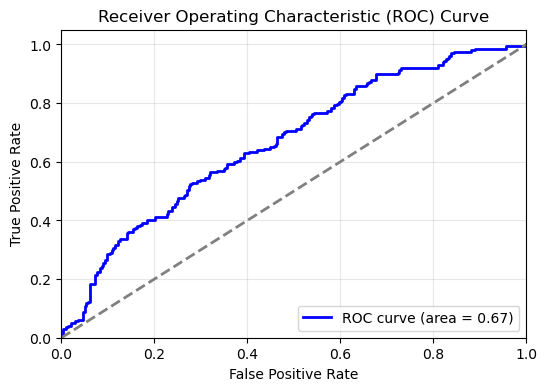

In [456]:
Y_prob = model2.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

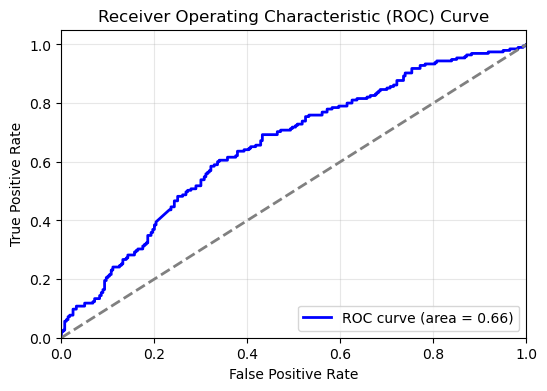

In [457]:
Y1_prob = model4.predict_proba(X1_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y1_test, Y1_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()